# Use iris flower dataset to predict flower species using random forest classifier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
gb_target = df.groupby('target')

In [23]:
gb_target.get_group(0).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
gb_flower_name = df.groupby('flower_name')

for flower_name, flower_name_df in gb_flower_name:
    print(flower_name)
    print(flower_name_df.head())

setosa
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
versicolor
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3    

In [29]:
gb_flower_name.get_group('setosa').head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
model.score(X_test,y_test)

0.9333333333333333

# Tune Parameter

In [41]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9333333333333333

# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

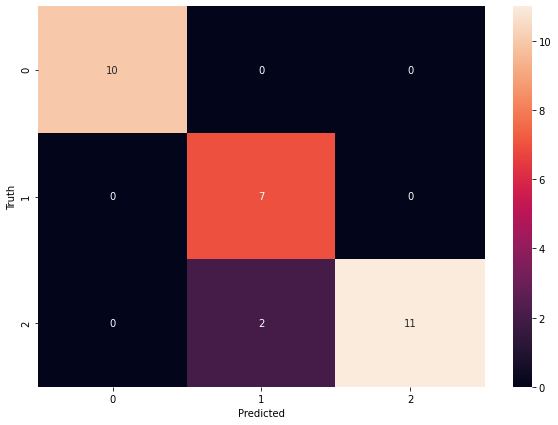

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')